In [137]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [259]:
from env.equity_env import EquityEnv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from stable_baselines import ACKTR
from stable_baselines.common.vec_env import SubprocVecEnv
from stable_baselines.common.policies import LstmPolicy

import empyrical

%matplotlib inline

n_cpus = 12

In [260]:
class CustomLSTMPolicy(LstmPolicy):
    def __init__(self, sess, ob_space, ac_space, n_env, n_steps, n_batch, n_lstm=4, reuse=False, **_kwargs):
        super().__init__(sess, ob_space, ac_space, n_env, n_steps, n_batch, n_lstm, reuse,
                         net_arch=[9,'lstm', dict(vf=[9, 6], pi=[9, 6])],
                         layer_norm=False, feature_extraction="mlp", **_kwargs)

In [261]:
env_dates = '2014-01-01', '2018-01-01'
ticker = 'XOM'

n_timesteps = 100000

env = SubprocVecEnv([lambda: EquityEnv(ticker, env_dates) for _ in range(n_cpus)])

model = ACKTR(CustomLSTMPolicy, env, verbose=0, gamma=0.99, tensorboard_log='logs/', full_tensorboard_log=False)

model.learn(total_timesteps=n_timesteps)
model.save('models/ACKTR_{}.pkl'.format(ticker))

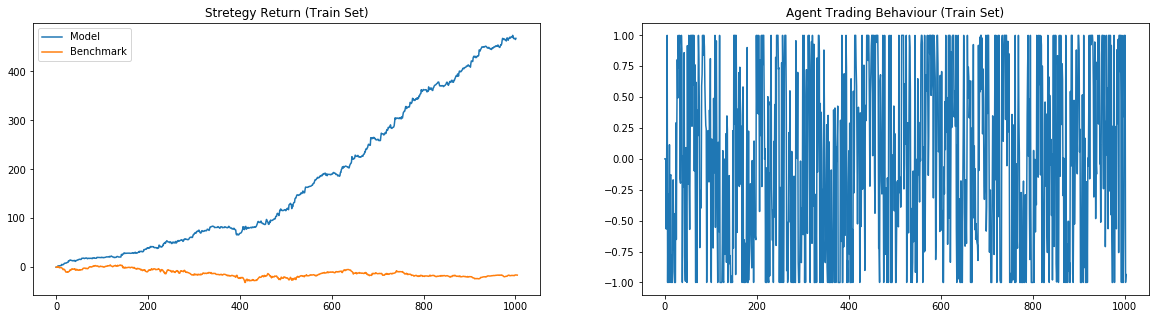

Wall time: 1.43 s


In [262]:
%%time
env_dates = '2014-01-01', '2018-01-01'
env_validation = EquityEnv(ticker, env_dates)

obs = np.repeat(np.expand_dims(env_validation.reset(), 0), n_cpus, 0)
state = None
done = False

while not done:
    action, state = model.predict(obs, state=state, mask=np.array([done for _ in range(n_cpus)]))
    obs, rewards, done, info = env_validation.step(action[0])
    obs = np.repeat(np.expand_dims(obs, 0), n_cpus, 0)
    
returns, exposures = env_validation.render()

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].plot(empyrical.cum_returns(pd.Series(returns))*100, label='Model')
ax[0].plot(empyrical.cum_returns(env_validation.equity_returns)*100, label='Benchmark')
ax[1].plot(exposures)

ax[0].set_title('Stretegy Return (Train Set)')
ax[1].set_title('Agent Trading Behaviour (Train Set)')

ax[0].legend()
plt.show()

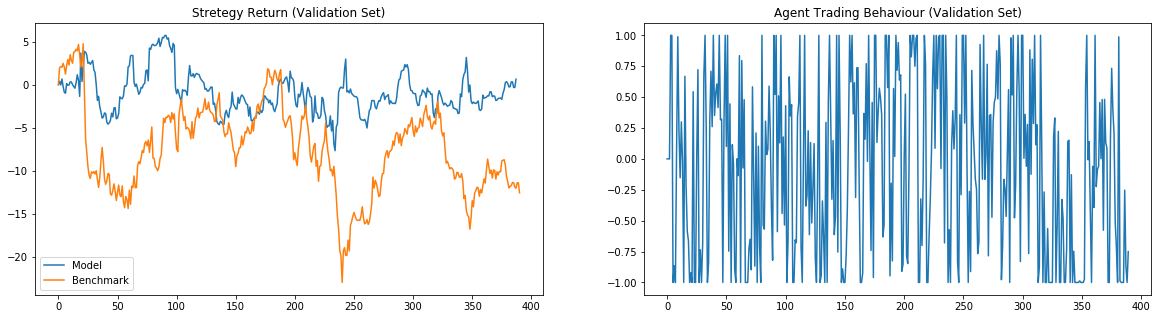

Wall time: 701 ms


In [282]:
%%time
env_dates = '2018-01-01', '2019-08-01'
env_validation = EquityEnv(ticker, env_dates)

obs = np.repeat(np.expand_dims(env_validation.reset(), 0), n_cpus, 0)
state = None
done = False

while not done:
    action, state = model.predict(obs, state=state, mask=np.array([done for _ in range(n_cpus)]))
    obs, rewards, done, info = env_validation.step(action[0])
    obs = np.repeat(np.expand_dims(obs, 0), n_cpus, 0)
    
returns, exposures = env_validation.render()

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].plot(empyrical.cum_returns(pd.Series(returns))*100, label='Model')
ax[0].plot(empyrical.cum_returns(env_validation.equity_returns)*100, label='Benchmark')
ax[1].plot(exposures)

ax[0].set_title('Stretegy Return (Validation Set)')
ax[1].set_title('Agent Trading Behaviour (Validation Set)')

ax[0].legend()
plt.show()

In [283]:
returns_benchmark = pd.DataFrame(env_validation.equity_returns, index=env_validation.full_data.index,
                                 columns=['XOM.Benchmark_Return'])

returns_model = pd.DataFrame(returns, index=env_validation.full_data.index[3:],
                                 columns=['XOM.Model_Return'])

returns_model.join(returns_benchmark)[1:].to_csv('data/returns/XOM_Returns.csv')

In [103]:
env_dates = '2014-01-01', '2018-01-01'
ticker = 'CVS'

n_timesteps = 100000

env = SubprocVecEnv([lambda: EquityEnv(ticker, env_dates) for _ in range(n_cpus)])

model = ACKTR(CustomLSTMPolicy, env, verbose=0, gamma=0.99, tensorboard_log='logs/', full_tensorboard_log=False)

model.learn(total_timesteps=n_timesteps)
model.save('models/ACKTR_{}.pkl'.format(ticker))

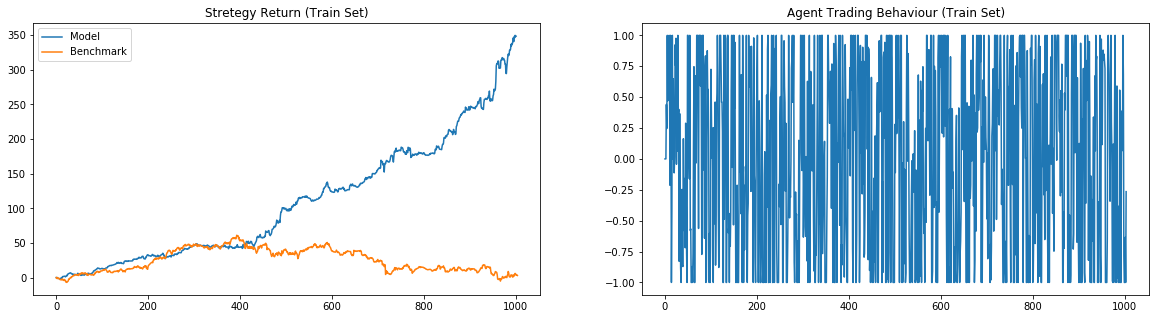

Wall time: 1.53 s


In [104]:
%%time
env_dates = '2014-01-01', '2018-01-01'
env_validation = EquityEnv(ticker, env_dates)

obs = np.repeat(np.expand_dims(env_validation.reset(), 0), n_cpus, 0)
state = None
done = False

while not done:
    action, state = model.predict(obs, state=state, mask=np.array([done for _ in range(n_cpus)]))
    obs, rewards, done, info = env_validation.step(action[0])
    obs = np.repeat(np.expand_dims(obs, 0), n_cpus, 0)
    
returns, exposures = env_validation.render()

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].plot(empyrical.cum_returns(pd.Series(returns))*100, label='Model')
ax[0].plot(empyrical.cum_returns(env_validation.equity_returns)*100, label='Benchmark')
ax[1].plot(exposures)

ax[0].set_title('Stretegy Return (Train Set)')
ax[1].set_title('Agent Trading Behaviour (Train Set)')

ax[0].legend()
plt.show()

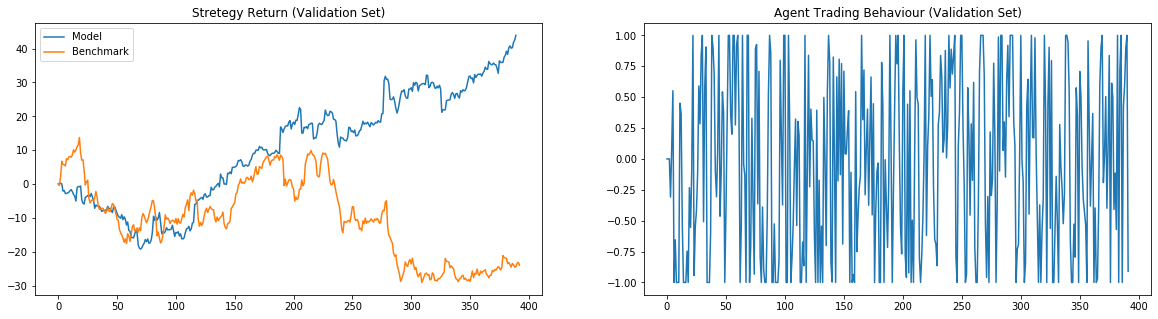

Wall time: 715 ms


In [130]:
%%time
env_dates = '2018-01-01', '2019-09-01'
env_validation = EquityEnv(ticker, env_dates)

obs = np.repeat(np.expand_dims(env_validation.reset(), 0), n_cpus, 0)
state = None
done = False

while not done:
    action, state = model.predict(obs, state=state, mask=np.array([done for _ in range(n_cpus)]))
    obs, rewards, done, info = env_validation.step(action[0])
    obs = np.repeat(np.expand_dims(obs, 0), n_cpus, 0)
    
returns, exposures = env_validation.render()

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].plot(empyrical.cum_returns(pd.Series(returns))*100, label='Model')
ax[0].plot(empyrical.cum_returns(env_validation.equity_returns)*100, label='Benchmark')
ax[1].plot(exposures)

ax[0].set_title('Stretegy Return (Validation Set)')
ax[1].set_title('Agent Trading Behaviour (Validation Set)')

ax[0].legend()
plt.show()

In [136]:
returns_benchmark = pd.DataFrame(env_validation.equity_returns, index=env_validation.full_data.index,
                                 columns=['CVS.Benchmark_Return'])

returns_model = pd.DataFrame(returns, index=env_validation.full_data.index[3:],
                                 columns=['CVS.Model_Return'])

returns_model.join(returns_benchmark)[1:].to_csv('data/returns/CVS_Returns.csv')